<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DDDM/blob/main/COIN/lanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[tutorial](https://www.geeksforgeeks.org/opencv-real-time-road-lane-detection/)

In [1]:
!pip install -q opencv-python

In [2]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # colab is special

[photo](https://commons.wikimedia.org/wiki/File:Ontario_Highway_401,_Near_Colbourne,_Ontario_%2829985970881%29.jpg)

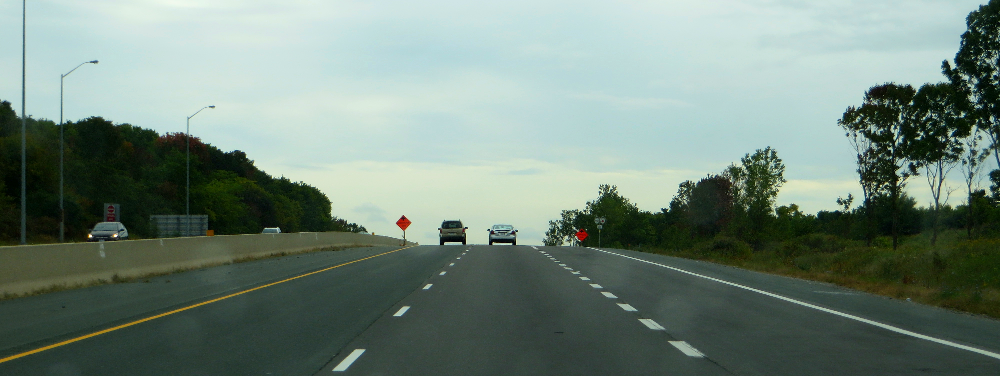

In [50]:
from urllib.request import urlopen
src = 'https://upload.wikimedia.org/wikipedia/commons/3/35/Ontario_Highway_401%2C_Near_Colbourne%2C_Ontario_%2829985970881%29.jpg'
req = urlopen(src)
arr = np.asarray(bytearray(req.read()), dtype = np.uint8)
img = cv2.imdecode(arr, -1)
oh, ow, ch = img.shape
width = 1000
height = None # the original photo is 4k pixels wide, which is very slow to process
if ow > width:
  ratio = oh / ow
  height = round(ratio * width)
  img = cv2.resize(img, (width, height)) # keep the aspect ratio
else:
  width = ow
  height = oh
cv2_imshow(img)

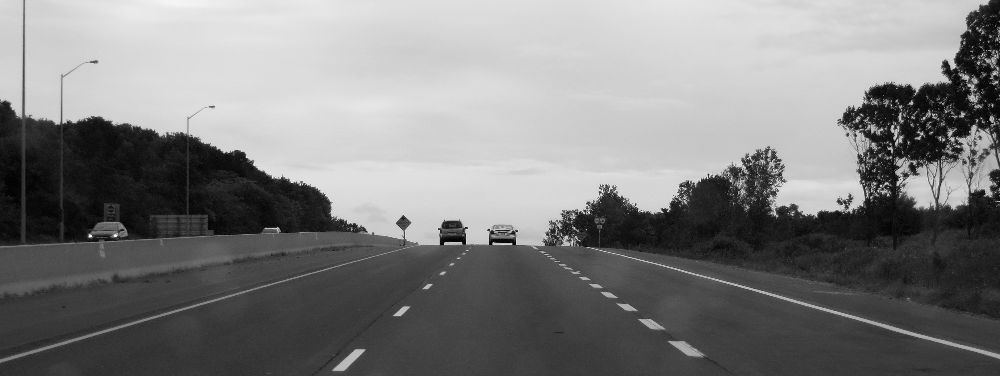

In [51]:
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gr)

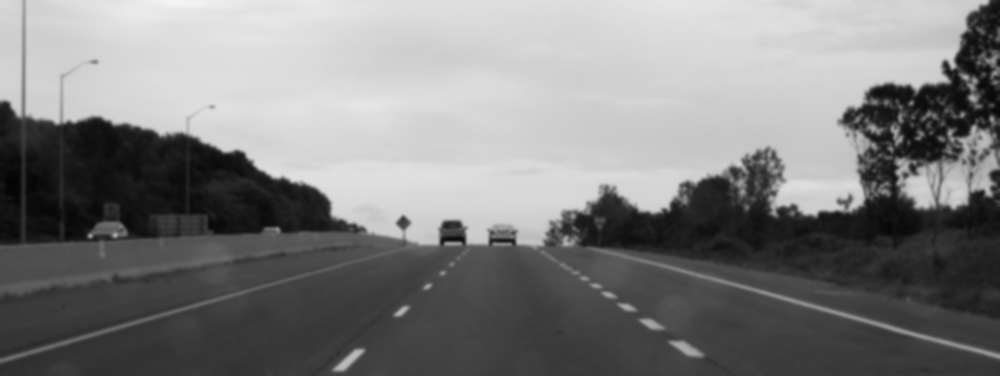

In [52]:
blur = cv2.GaussianBlur(gr, (7, 7), 0) # noise reduction
cv2_imshow(blur)

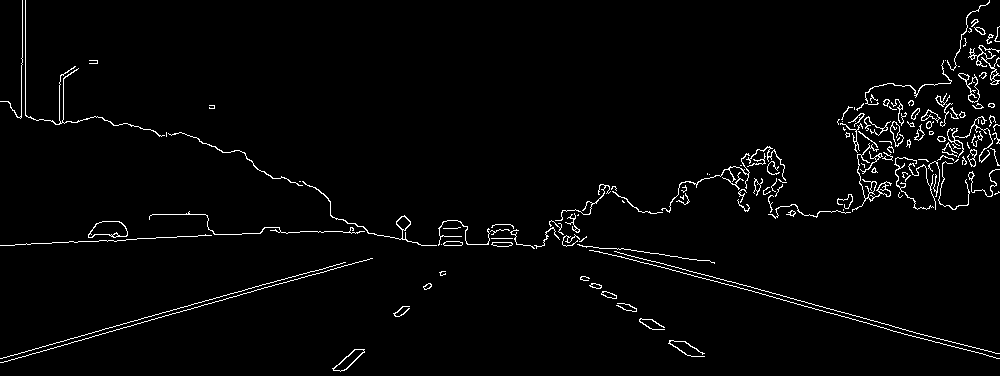

In [53]:
edges = cv2.Canny(blur, 50, 150)
cv2_imshow(edges)

In [96]:
from math import fabs

ht = cv2.HoughLinesP(edges, rho = 3, theta = np.pi / 360, threshold = 30, minLineLength = 30, maxLineGap = 800)
cutoff = round(0.3 * height)
threshold = 0.3
margin = 0.1 * width
center = width // 2
nearest = []
dist = []
keep = 10
for line in ht:
  if line is not None:
    p1 = line[0][:2] # first (x, y)
    p2 = line[0][2:] # second (x, y)
    (x1, y1) = p1
    (x2, y2) = p2
    dy = y1 - y2
    dx = x1 - x2
    slope = dy / dx
    if min(y1, y2) > cutoff: # (0,0) being upper left
      if min(x1, x2) > margin and max(x1, x2) < width - margin:
        if fabs(slope) > threshold:
         offset = (center - (x1 + x2) / 2)
         if len(nearest) < keep:
           nearest.append(line)
           dist.append(offset)
         elif max(dist) < offset:
           repl = dist.index(max(dist))
           dist[repl] = offset
           nearest[repl] = line

nearest

[array([[506, 224, 687, 355]], dtype=int32),
 array([[333, 369, 439, 272]], dtype=int32),
 array([[507, 229, 703, 353]], dtype=int32),
 array([[343, 370, 491, 227]], dtype=int32),
 array([[599, 284, 693, 356]], dtype=int32),
 array([[544, 245, 703, 356]], dtype=int32),
 array([[346, 369, 488, 229]], dtype=int32),
 array([[568, 210, 714, 281]], dtype=int32),
 array([[333, 368, 492, 230]], dtype=int32)]

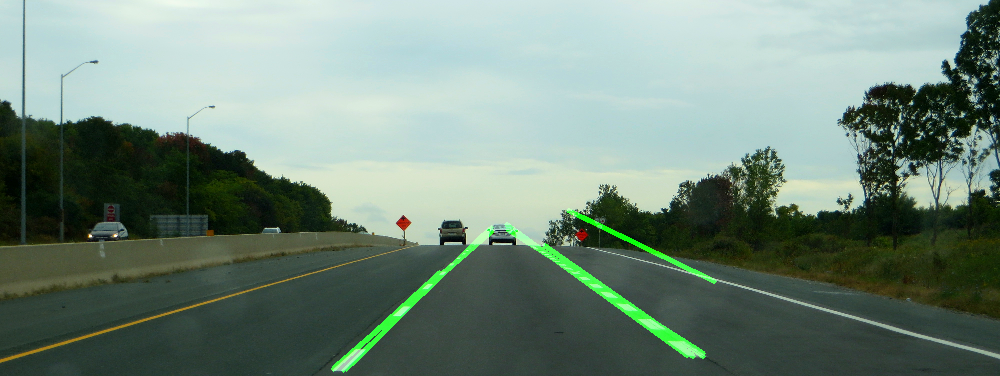

In [97]:
color = [0, 255, 0]
lines = np.zeros_like(img)
for line in nearest:
    cv2.line(lines, line[0][:2], line[0][2:], color, 3)

combo = cv2.addWeighted(img, 1.0, lines, 1.0, 0.0)
cv2_imshow(combo)